# Solutions from the advection equation practicum

In [3]:
# setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np


In [10]:
# function to animate results from a given output file
def animateResults(filename='output.dat',experiments=None):
    # load data
    with open(filename) as fid:
        # read header
        header=fid.readline().split()
        nx=int(header[0])
        dx=float(header[1])
        nt=int(header[2])
        dt=float(header[3])
        nExperiments=int(header[4])
        # read experiment names
        expNames=fid.readline().split('"')[1::2]
        # read data
        data=np.loadtxt(filename,skiprows=2)
        data=data.reshape((int(data.shape[0]/nExperiments),nExperiments,nx))
    
    if experiments is None:
        experiments=range(nExperiments)
    
    # define time and space
    t = np.arange(nt+1)*dt
    x = np.arange(nx)*dx

    # create empty figure
    fig, ax = plt.subplots(figsize=(12,8));
    h = ax.axis([0,nx*dx,-np.max(np.abs(data[0,:])),np.max(data[0,:])])
    ll=[None]*nExperiments
    
    for iExperiment in experiments:
        lll, = ax.plot([],[],label=expNames[iExperiment])
        ll[iExperiment]=lll
    tt=plt.title('')
    plt.legend()

    # define plot function for a single time step
    def plotResults(it):
        tt.set_text('%3i/%3i'%(it,nt))
        for iExperiment in experiments:
            ll[iExperiment].set_data(x, data[it,iExperiment,:])
    
    # animate over timesteps
    ani = matplotlib.animation.FuncAnimation(fig, plotResults, frames=data.shape[0])
    plt.close()
    display(ani)
    
# function to plot results from a given output file for a given timestep
def showResults(filename='output.dat',experiments=None,timestep=None):
    # load data
    with open(filename) as fid:
        # read header
        header=fid.readline().split()
        nx=int(header[0])
        dx=float(header[1])
        nt=int(header[2])
        dt=float(header[3])
        nExperiments=int(header[4])
        # read experiment names
        expNames=fid.readline().split('"')[1::2]
        # read data
        data=np.loadtxt(filename,skiprows=2)
        data=data.reshape((int(data.shape[0]/nExperiments),nExperiments,nx))
    
    if experiments is None:
        experiments=range(nExperiments)
    
    if timestep is None:
        timestep=data.shape[0]-1
        
    # define time and space
    t = np.arange(nt+1)*dt
    x = np.arange(nx)*dx

    # create empty figure
    fig, ax = plt.subplots(figsize=(12,8));
    h = ax.axis([0,nx*dx,-np.max(np.abs(data[0,:])),np.max(data[0,:])])
    ll=[None]*nExperiments
    
    for iExperiment in experiments:
        lll, = ax.plot([],[],label=expNames[iExperiment])
        ll[iExperiment]=lll
    tt=plt.title('')
    plt.legend()

    # define plot function for a single time step
    def plotResults(it):
        tt.set_text('%3i/%3i'%(it,nt))
        for iExperiment in experiments:
            ll[iExperiment].set_data(x, data[it,iExperiment,:])
    
    # plot single timesteps
    plotResults(timestep)

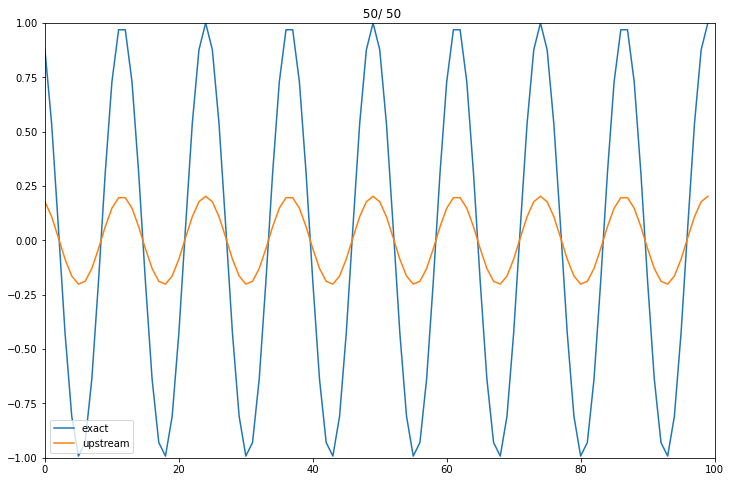

In [11]:
# upstream
filename='upstream/output.dat'
showResults(filename)

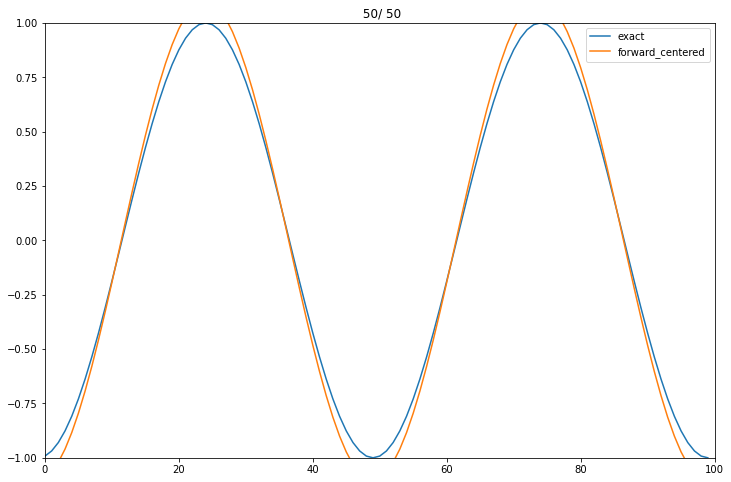

In [12]:
# forward_centered
filename='forward_centered/output.dat'
showResults(filename)

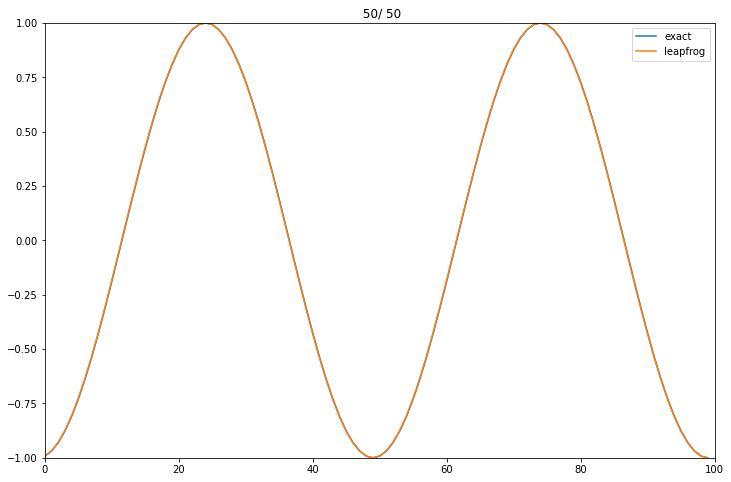

In [13]:
# leapfrog_centered
filename='leapfrog_centered/output.dat'
showResults(filename)

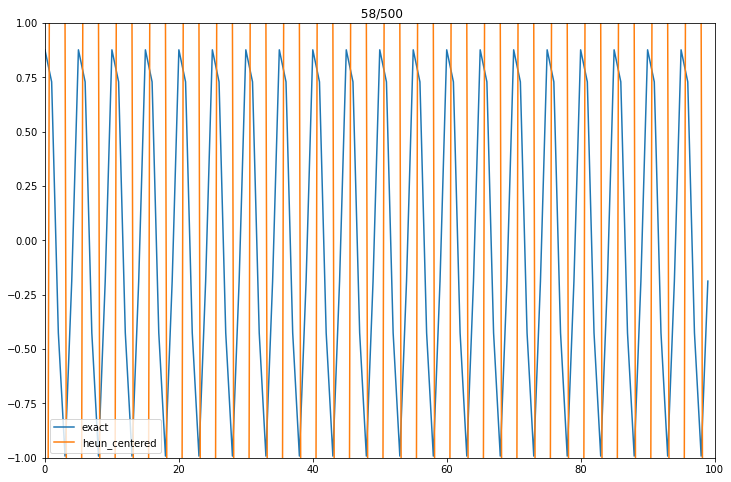

In [14]:
# heun_centered
filename='heun_centered/output.dat'
showResults(filename)

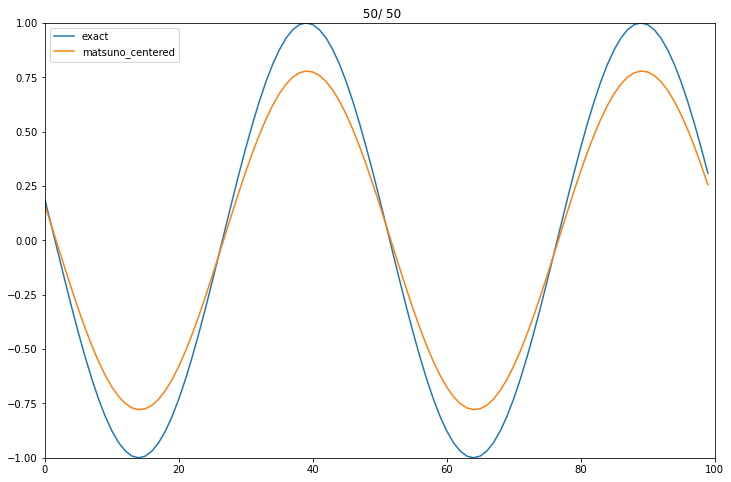

In [15]:
# matsuno_centered
filename='matsuno_centered/output.dat'
showResults(filename)

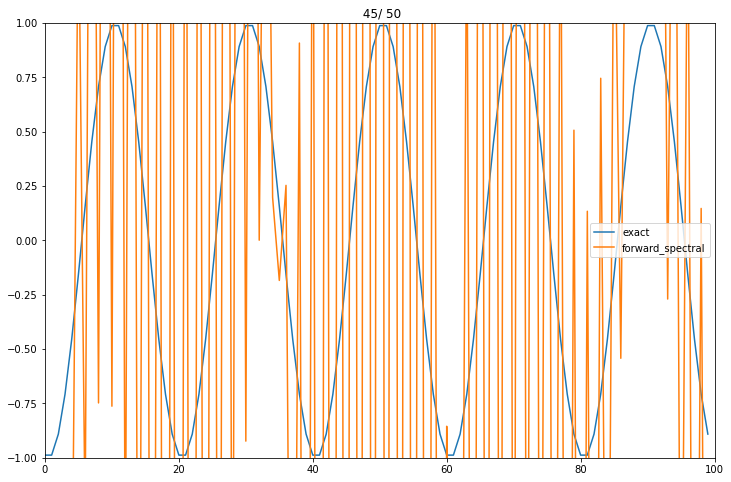

In [16]:
# forward_spectral
filename='forward_spectral/output.dat'
showResults(filename)

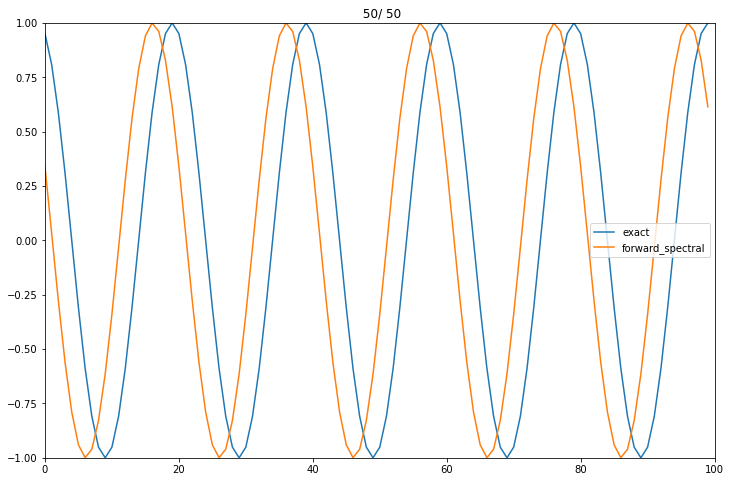

In [17]:
# trapezium_spectral
filename='trapezium_spectral/output.dat'
showResults(filename)